In [159]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
class Dataset:
    def __init__(self, mode='given', means1=[-5, 0], means2=[0, 5]):
        if mode == 'given':
            self._given_data()
        if mode == 'random':
            self._rand_sample(means1, means2)

    def _rand_sample(self, means1, means2):
        means1 = np.array(means1)
        means2 = np.array(means2)
        covar = np.array([1, 0, 0, 1]).reshape(2,2)
        x1 = np.random.multivariate_normal(means1, covar, size=200)
        x2 = np.random.multivariate_normal(means2, covar, size=200)
        y1 = np.ones((200, 1))
        y2 = np.ones((200, 1)) * -1
        self._split(x1, y1, x2, y2)

    def _split(self, x1, y1, x2, y2):
        num1 = x1.shape[0]
        train_num1 = int(num1 * 0.8)
        num2 = x2.shape[0]
        train_num2 = int(num2 * 0.8)

        self.x_train = np.concatenate((x1[:train_num1],x2[:train_num2]),axis=0)
        self.y_train = np.concatenate((y1[:train_num1],y2[:train_num2]),axis=0)
        self.x_test = np.concatenate((x1[train_num1:],x2[train_num2:]),axis=0)
        self.y_test = np.concatenate((y1[train_num1:],y2[train_num2:]),axis=0)

    def _given_data(self):
        x = [5, 37,
             7, 30, 
             10, 35, 
             11.5, 40, 
             14, 38, 
             12, 31, 
             35, 21.5, 
             39, 21.7, 
             34, 16, 
             37, 17]
        y = [1,1,1,1,1,1,-1,-1,-1,-1]
        self.x = np.array(x).reshape(-1,2)
        self.y = np.array(y).reshape(-1,1)
        assert(self.x.shape[0] == self.y.shape[0])

In [161]:
class Fisher:
    def __init__(self):
        self.w = np.zeros((2,1))
        self.thresh = 0

    def train(self, x, y):
        assert(x.shape[0] == y.shape[0])
        y = y.flatten()

        cls1_idx = np.where(y == 1)
        cls2_idx = np.where(y == -1)
        c1 = x[cls1_idx].T
        c2 = x[cls2_idx].T
        
        mean1 = np.mean(c1, axis=-1)
        mean2 = np.mean(c2, axis=-1)
        covar1 = np.cov(c1)
        covar2 = np.cov(c2)

        sw = covar1 + covar2
        self.w = np.matmul(np.linalg.inv(sw), (mean1 - mean2))
        self.thresh = np.matmul(self.w.T, mean1 + mean2) / 2
        ## print('c1: {}'.format(c1))
        ## print('c2: {}'.format(c2))
        print('covar1: {}'.format(covar1))
        print('covar2: {}'.format(covar2))
        print('mean1: {}'.format(mean1))
        print('mean2: {}'.format(mean2))
        print('\nOver training!')
        print('w: {}'.format(self.w))
        print('thereshold: {}'.format(self.thresh))

        return self.w, self.thresh

    def eval(self, x, y):
        assert(x.shape[0] == y.shape[0])
        
        yhat = np.matmul(x, self.w)
        yhat = np.sign(yhat - self.thresh)
        yhat = yhat.reshape(-1,1)
        correct_num = len(np.where((yhat - y) == 0)[1])
        accuracy = correct_num / y.shape[0]
        print('accuracy: %.2f'%accuracy)



生成数据集

x_train: (320, 2)
y_train: (320, 1)
x_test: (80, 2)
y_test: (80, 1)


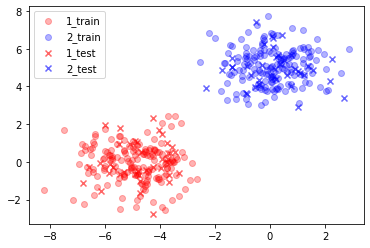

In [162]:
dataset = Dataset(mode='random')
x_train = dataset.x_train
y_train = dataset.y_train
x_test = dataset.x_test
y_test = dataset.y_test

print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))
c1 = plt.scatter(x_train[:160,0], x_train[:160,1], alpha=0.3, marker='o', c='red')
c2 = plt.scatter(x_train[160:,0], x_train[160:,1], alpha=0.3, marker='o', c='blue')
c3 = plt.scatter(x_test[:40,0], x_test[:40,1], alpha=0.6, marker='x', c='red')
c4 = plt.scatter(x_test[40:,0], x_test[40:,1], alpha=0.6, marker='x', c='blue')
plt.legend(handles=[c1, c2, c3, c4],labels=['1_train','2_train', '1_test', '2_test'],loc='best')
plt.show()

使用训练集训练Fisher线性判别器，并输出训练得到的w和threshold，最后打印在训练集上的准确率

In [163]:
classifier = Fisher()
w, thresh = classifier.train(x_train, y_train)
classifier.eval(x_train, y_train)

covar1: [[ 1.13717172 -0.0498508 ]
 [-0.0498508   1.00904563]]
covar2: [[0.9880734  0.02352414]
 [0.02352414 0.9370434 ]]
mean1: [-4.91250869 -0.07985864]
mean2: [0.07087093 5.08384965]

Over training!
w: [-2.3781168  -2.68554833]
thereshold: -0.9622397940870888
accuracy: 1.00


可以看出，在训练Fisher判别器时，其输出的协方差矩阵和均值基本等于随机生成该数据集时的给定参数

测试其在测试集上的准确率

In [164]:
classifier.eval(x_test, y_test)

accuracy: 1.00
